<a href="https://colab.research.google.com/github/Cavera360JM/ONIA/blob/main/ONIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatísticas Descritivas (Descriptive Statistics):
                 id         col_0         col_1         col_2         col_3  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean    7492.725048     34.041646      3.008547      2.270856     12.809551   
std     4347.394049      8.428862      0.789293      0.555685      2.809632   
min        0.000000      2.334047      0.000000      0.000000      2.291309   
25%     3706.250000     28.314237      2.473870      1.908040     10.929376   
50%     7500.000000     33.597613      2.995180      2.235584     12.876576   
75%    11293.250000     39.444095      3.548535      2.623687     14.686464   
max    14999.000000     71.608174      6.333788      4.697276     24.071470   

              col_4         col_5         col_6         col_7         col_8  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      25.362808      7.622088      4.929185      5.845511      3.899460   


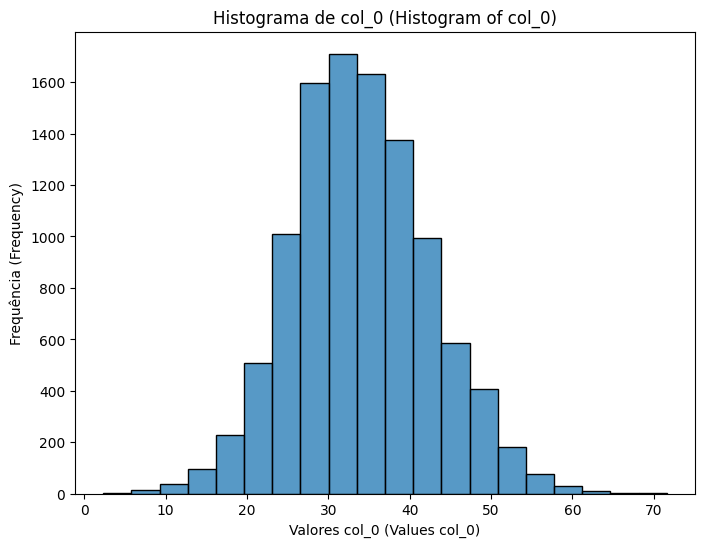

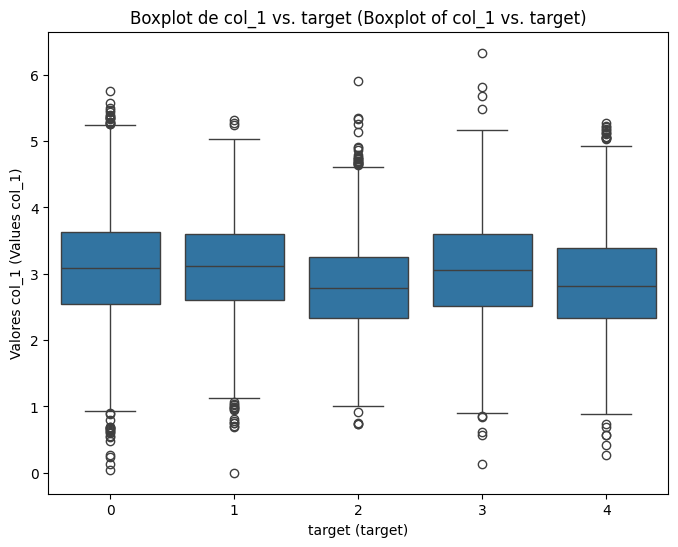

Melhores hiperparâmetros (Best hyperparameters): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Precisão média (F1-score) (Average accuracy (F1-score)): 0.5495770756697381
Arquivo de envio 'submission.csv' criado com sucesso! (Submission file 'submission.csv' created successfully!)
F1-score no conjunto de treino (F1-score on training set): 0.8196489775266214
Instâncias classificadas incorretamente (Incorrectly classified instances):
          id      col_0     col_1     col_2      col_3      col_4      col_5  \
13      5913  45.156231  2.834723  1.654739  16.598296  31.802927  10.693380   
20      8542  23.903423  3.258914  1.588991  17.730389  32.490177  10.202151   
21      5679  39.982160  2.558656  2.589103  11.821856  22.036238   6.370611   
22      8821  33.556158  3.512307  2.130822  16.285596  26.826542  10.743183   
48      4522  37.561598  3.029389  2.449853   9.374217  23.491789   5.128460   
...      ...        ...       ...     

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados de treinamento e teste (Load training and test data)
train_data = pd.read_csv("treino.csv")
test_data = pd.read_csv("teste.csv")

# 2. Preparar os dados (Prepare the data)
features = [f"col_{i}" for i in range(13)]
X_train = train_data[features]
y_train = train_data["target"]
X_test = test_data[features]

# 3. Análise Exploratória de Dados (EDA) (Exploratory Data Analysis)

# 3.1. Estatísticas Descritivas (Descriptive Statistics)
print("Estatísticas Descritivas (Descriptive Statistics):")
print(train_data.describe())

# 3.2. Visualizações (Overview)

# Exemplo: Histograma da coluna 'col_0' (Example: Histogram of column 'col_0')
plt.figure(figsize=(8, 6))
sns.histplot(train_data["col_0"], bins=20)
plt.title("Histograma de col_0 (Histogram of col_0)")
plt.xlabel("Valores col_0 (Values col_0)")
plt.ylabel("Frequência (Frequency)")
plt.show()

# Explicação do Histograma:
# Este gráfico mostra a distribuição dos valores da coluna 'col_0'. O eixo x representa os valores da coluna,
# e o eixo y representa a frequência com que esses valores aparecem nos dados. A forma do histograma
# pode dar uma ideia da distribuição dos dados (por exemplo, se é normal, enviesada, etc.).

# Explanation of the Histogram:
# This graph shows the distribution of values in the 'col_0' column. The x-axis represents the values of the column,
# and the y-axis represents the frequency with which these values appear in the data. The shape of the histogram
# can give an idea of the data distribution (e.g., whether it is normal, skewed, etc.).

# Exemplo: Boxplot da relação entre 'col_1' e 'target' (Example: Boxplot of the relationship between 'col_1' and 'target')
plt.figure(figsize=(8, 6))
sns.boxplot(x="target", y="col_1", data=train_data)
plt.title("Boxplot de col_1 vs. target (Boxplot of col_1 vs. target)")
plt.xlabel("target (target)")
plt.ylabel("Valores col_1 (Values col_1)")
plt.show()

# Explicação do Boxplot:
# Este gráfico mostra a distribuição dos valores da coluna 'col_1' para cada categoria da coluna 'target'.
# O boxplot exibe a mediana, os quartis e os outliers dos dados. Ele ajuda a comparar a distribuição de
# 'col_1' entre as diferentes categorias de 'target'.

# Explanation of the Boxplot:
# This graph shows the distribution of values in the 'col_1' column for each category of the 'target' column.
# The boxplot displays the median, quartiles, and outliers of the data. It helps to compare the distribution of
# 'col_1' between the different categories of 'target'.

# 4. Ajuste de Hiperparâmetros com GridSearchCV (Hyperparameter Tuning with GridSearchCV)
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Melhores hiperparâmetros (Best hyperparameters): {grid_search.best_params_}")

# 5. Avaliação do Modelo com Validação Cruzada (usando F1-score) (Model Evaluation with Cross-Validation using F1-score)
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="f1_macro")
print(f"Precisão média (F1-score) (Average accuracy (F1-score)): {scores.mean()}")

# 6. Fazer previsões no conjunto de teste (Make predictions on the test set)
predictions = best_model.predict(X_test)

# 7. Criar o arquivo de envio (Create the submission file)
submission = pd.DataFrame({"id": test_data["id"], "target": predictions})

# 7.1 Adicionar uma linha extra (Add an extra row)
nova_linha = {"id": -1, "target": 0}  # Substitua -1 e 0 pelos valores desejados (Replace -1 and 0 with desired values)
submission = pd.concat([submission, pd.DataFrame([nova_linha])], ignore_index=True)

# 7.2 Salvar o arquivo de envio (Save the submission file)
submission.to_csv("submission.csv", index=False)
print("Arquivo de envio 'submission.csv' criado com sucesso! (Submission file 'submission.csv' created successfully!)")

# 8. Avaliação do modelo no conjunto de treino para o relatório (Evaluate the model on the training set for the report)
f1 = f1_score(y_train, best_model.predict(X_train), average='macro')
print(f"F1-score no conjunto de treino (F1-score on training set): {f1}")

# 9. Análise de Erros (opcional) (Error Analysis (optional))
# Identificar instâncias classificadas incorretamente (Identify incorrectly classified instances)
train_predictions = best_model.predict(X_train)
errors = train_data[train_predictions != y_train]
print("Instâncias classificadas incorretamente (Incorrectly classified instances):")
print(errors)

# 10. Verificar o número de linhas no submission.csv (Verify the number of rows in submission.csv)
print(f"Arquivo de envio 'submission.csv' agora tem {len(pd.read_csv('submission.csv'))} linhas. (Submission file 'submission.csv' now has {len(pd.read_csv('submission.csv'))} rows.)")